Importing the package

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import keras
from matplotlib import pyplot as plt

Loading and Preprocessing

In [2]:
# Loading the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Normalizing the inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# Converting the 2D data to 1D vector format
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

Creating the Model

In [4]:
# Size of encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))
encodedHiddenLayer = Dense(256, activation='relu')(input_img) # Enocoder Hidden Layer with 256 nodes
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(encodedHiddenLayer)

decodedHiddenLayer = Dense(256, activation='relu')(encoded) # Decoder Hideen Layer with 256 nodes
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(decodedHiddenLayer)

# The model maps an input to its reconstruction
autoEncoder = Model(input_img, decoded)
# Changed the learning rate to 1. Since the default learning rate of 0.001 is slowing down the training process.
# We can replace Adadelta with Adam optimizer which is giving better results. 
optimizer = keras.optimizers.Adadelta(learning_rate=1)
autoEncoder.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=["accuracy"])

In [5]:
autoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               201488    
Total params: 419,120
Trainable params: 419,120
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [6]:
# Fit the model
history = autoEncoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/20
235/235 [==============================] - 5s 6ms/step - loss: 0.5668 - accuracy: 0.0011 - val_loss: 0.3941 - val_accuracy: 0.0042
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3807 - accuracy: 0.0084 - val_loss: 0.3666 - val_accuracy: 0.0049
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3627 - accuracy: 0.0058 - val_loss: 0.3532 - val_accuracy: 0.0056
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.0061 - val_loss: 0.3437 - val_accuracy: 0.0065
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3383 - accuracy: 0.0099 - val_loss: 0.3335 - val_accuracy: 0.0112
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.0112 - val_loss: 0.3306 - val_accuracy: 0.0135
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.0108 - val_loss: 0.3287 - val_accuracy: 0.0134
Epoch 

Predicition & Visualization on Test data

In [7]:
prediction = autoEncoder.predict(x_test_noisy[[0],:])

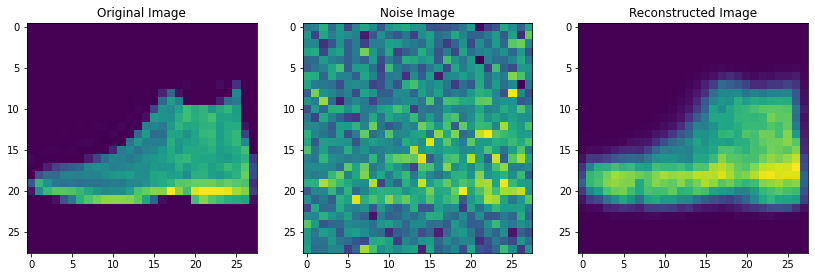

In [9]:
# Plotting the first test image and its generated image using autoEncoder
fig = plt.figure(figsize=(14, 10))

# Original Image
ax = fig.add_subplot(1, 3, 1)
ax.imshow(x_test[0].reshape(28,28))
ax.set_title("Original Image")

# Noise Image
ax = fig.add_subplot(1, 3, 2)
ax.imshow(x_test_noisy[0].reshape(28,28))
ax.set_title("Noise Image")

# Reconstructed Image
ax = fig.add_subplot(1, 3, 3)
ax.imshow(prediction[0].reshape(28,28))
ax.set_title("Reconstructed Image")


Loss & Accuracy Visualization during training phase

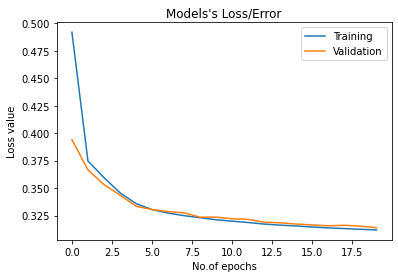

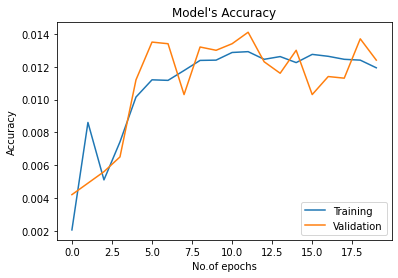

In [10]:
# Models Loss/Error value during training phase
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Models's Loss/Error")
plt.legend(["Training", "Validation"])
plt.xlabel("No.of epochs")
plt.ylabel("Loss value")
plt.show()

# Models Accuracy during training phase
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.legend(['Training', 'Validation'])
plt.xlabel('No.of epochs')
plt.ylabel("Accuracy")
plt.show()

Bonus Question

Text(0.5, 1.0, 'Encoded Representation')

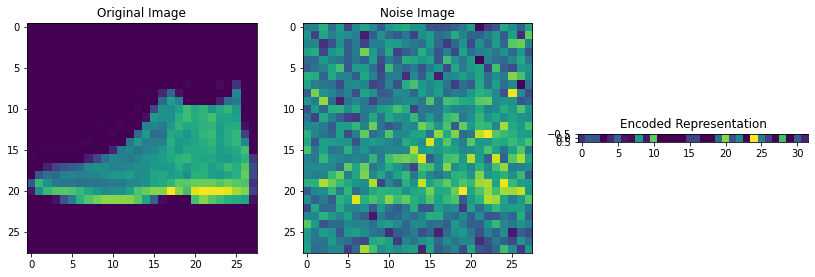

In [11]:
# Getting the middle layer output i.e compressed version
encoder = Model(autoEncoder.layers[0].input,autoEncoder.layers[2].output)
encodedFormat = encoder.predict(x_test_noisy[[0],:])

# Plotting the first test image and its generated image using autoEncoder
fig = plt.figure(figsize=(14, 10))

# Original Image
ax = fig.add_subplot(1, 3, 1)
ax.imshow(x_test[0].reshape(28,28))
ax.set_title("Original Image")

# Noise Image
ax = fig.add_subplot(1, 3, 2)
ax.imshow(x_test_noisy[0].reshape(28,28))
ax.set_title("Noise Image")

# Encoded Representation
ax = fig.add_subplot(1, 3, 3)
ax.imshow(encodedFormat)
ax.set_title("Encoded Representation")